In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID', 'Mouse ID'])
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
len(complete_data['Mouse ID'])

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mask = complete_data.duplicated()
duplicated_rows = complete_data[mask]
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean = complete_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')

In [8]:
# Checking the number of mice in the clean DataFrame.
len(complete_data_clean['Mouse ID'])

1888

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Ramicane
ramicane = complete_data.loc[(complete_data['Drug Regimen'] == 'Ramicane')]
print(st.sem(ramicane['Tumor Volume (mm3)']))
ramicane2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Ramicane').describe()
ramicane2

0.3209546065084817


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1665.0,51.849469,8.393105,23.343598,45.704434,50.363110,57.197193,78.567014
True,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816


In [10]:
# Capomulin
capomulin = complete_data.loc[(complete_data['Drug Regimen'] == 'Capomulin')]
print(st.sem(capomulin['Tumor Volume (mm3)']))
capomulin2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Capomulin').describe()
capomulin2

0.3293456234008309


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1663.0,51.799978,8.460660,22.050126,45.632578,50.378058,57.211087,78.567014
True,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209


In [11]:
# Infubinol
infubinol = complete_data.loc[(complete_data['Drug Regimen'] == 'Infubinol')]
print(st.sem(infubinol['Tumor Volume (mm3)']))
infubinol2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Infubinol').describe()
infubinol2

0.4922356938011383


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1715.0,50.195505,9.066317,22.050126,45.000000,48.529978,56.180969,78.567014
True,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731


In [12]:
# Placebo
placebo = complete_data.loc[(complete_data['Drug Regimen'] == 'Placebo')]
print(st.sem(placebo['Tumor Volume (mm3)']))
placebo2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Placebo').describe()
placebo2

0.5813305510593877


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1712.0,50.069338,8.918911,22.050126,45.000000,48.567005,55.817878,78.567014
True,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939


In [13]:
# Ceftamin
ceftamin = complete_data.loc[(complete_data['Drug Regimen'] == 'Ceftamin')]
print(st.sem(ceftamin['Tumor Volume (mm3)']))
ceftamin2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Ceftamin').describe()
ceftamin2

0.46982053275261093


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1715.0,50.225980,9.096627,22.050126,45.000000,48.665607,56.180969,78.567014
True,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185


In [14]:
# Stelasyn
stelasyn = complete_data.loc[(complete_data['Drug Regimen'] == 'Stelasyn')]
print(st.sem(stelasyn['Tumor Volume (mm3)']))
stelasyn2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Stelasyn').describe()
stelasyn2

0.5731109332771458


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1712.0,50.048239,8.919396,22.050126,45.000000,48.518732,55.817878,78.567014
True,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [15]:
# Zoniferol
zoniferol = complete_data.loc[(complete_data['Drug Regimen'] == 'Zoniferol')]
print(st.sem(zoniferol['Tumor Volume (mm3)']))
zoniferol2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Zoniferol').describe()
zoniferol2

0.5163978968332169


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1711.0,50.151806,9.026853,22.050126,45.000000,48.665207,56.058692,78.567014
True,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


In [16]:
# Ketapril
ketapril = complete_data.loc[(complete_data['Drug Regimen'] == 'Ketapril')]
print(st.sem(ketapril['Tumor Volume (mm3)']))
ketapril2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Ketapril').describe()
ketapril2

0.6038598237739697


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1705.0,49.920519,8.804224,22.050126,45.000000,48.432197,55.591816,76.668817
True,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014


In [17]:
# Propriva
propriva = complete_data.loc[(complete_data['Drug Regimen'] == 'Propriva')]
print(st.sem(propriva['Tumor Volume (mm3)']))
propriva2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Propriva').describe()
propriva2

0.5128841213647221


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1732.0,50.274165,9.066586,22.050126,45.000000,48.675092,56.298917,78.567014
True,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421


In [18]:
# Naftisol
naftisol = complete_data.loc[(complete_data['Drug Regimen'] == 'Naftisol')]
print(st.sem(naftisol['Tumor Volume (mm3)']))
naftisol2 = complete_data['Tumor Volume (mm3)'].groupby(complete_data['Drug Regimen'] == 'Naftisol').describe()
naftisol2

0.5964657512424235


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
False,1707.0,50.025257,8.873713,22.050126,45.000000,48.571516,55.858999,78.567014
True,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817


# Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

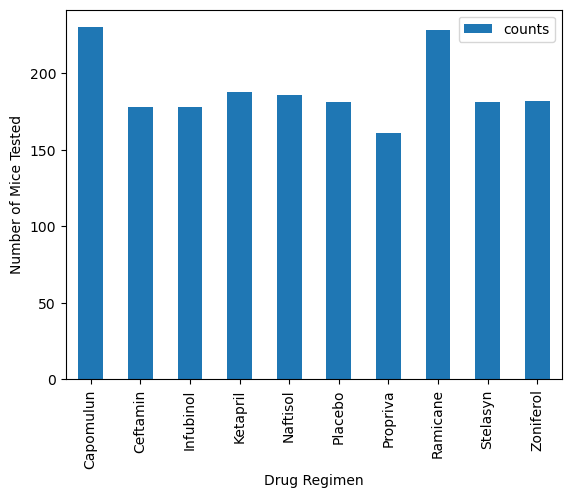

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimens = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
mice = complete_data.groupby('Drug Regimen')
mice2 = mice['Mouse ID'].count()
plot1_data = pd.DataFrame({'regimens':['Capomulun','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo', 'Propriva', 'Ramicane','Stelasyn','Zoniferol'],
                        'counts': [230,178,178,188,186,181,161,228,181,182]})
plot1 = plot1_data.plot.bar(x = 'regimens', y = 'counts')
plot1.set_xlabel('Drug Regimen')
plot1.set_ylabel('Number of Mice Tested')

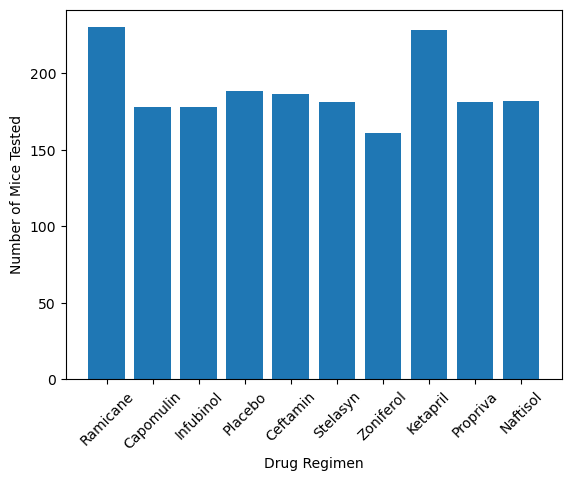

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
y_values = [230,178,178,188,186,181,161,228,181,182]
plt.bar(x_values, y_values)
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

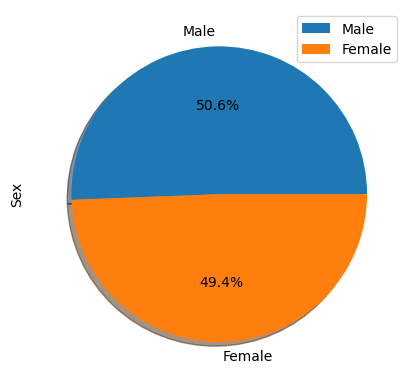

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_count = complete_data.loc[(complete_data['Sex'] == 'Male')].count()
female_count = complete_data.loc[(complete_data['Sex'] == 'Female')].count()
count_df = pd.DataFrame({'Sex': [958,935]}, index = ['Male', 'Female'])
plot2 = count_df.plot.pie(y = 'Sex', autopct='%1.1f%%', shadow = True)

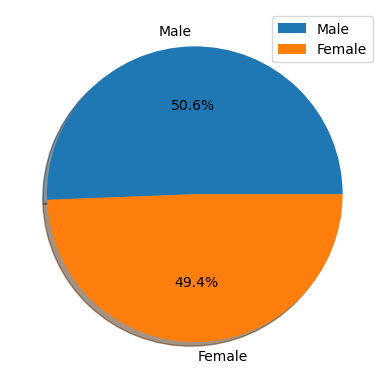

In [22]:
sex_counts = [958, 935]
labels = ['Male', 'Female']
plt.pie(sex_counts, labels = labels, shadow = True, autopct='%1.1f%%')
plt.legend()
plt.show()

# Quartiles, Outliers, and Box Plots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [44]:
max_time = pd.DataFrame(complete_data_clean['Timepoint'].groupby(complete_data_clean['Mouse ID']).max())
max_time

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [45]:
# CAPOMULIN MICE

capomulin_data = complete_data_clean.loc[(complete_data_clean['Drug Regimen'] == 'Capomulin')]
capo_max_time = capomulin_data.merge(max_time, how = 'left', on = 'Mouse ID')
results = capo_max_time.loc[(capo_max_time['Timepoint_x'] == capo_max_time['Timepoint_y']),'Tumor Volume (mm3)']
results_df = pd.DataFrame(results)
results2 = capo_max_time.loc[(capo_max_time['Timepoint_x'] == capo_max_time['Timepoint_y']),'Mouse ID']
results2_df = pd.DataFrame(results2)
results_complete = pd.merge(results_df, results2_df, left_index = True, right_index = True)
capo_complete = capo_max_time.merge(results_complete, how = 'left', on = 'Mouse ID')
capo_complete.rename(columns = {'Tumor Volume (mm3)_y':'Final Tumor Volume'}, inplace = True)
capo_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Final Tumor Volume
0,s185,Capomulin,Female,3,17,0,45.000000,0,45,23.343598
1,s185,Capomulin,Female,3,17,5,43.878496,0,45,23.343598
2,s185,Capomulin,Female,3,17,10,37.614948,0,45,23.343598
3,s185,Capomulin,Female,3,17,15,38.177232,0,45,23.343598
4,s185,Capomulin,Female,3,17,20,36.866876,0,45,23.343598
...,...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,45,47.685963
226,r157,Capomulin,Male,22,25,0,45.000000,0,15,46.539206
227,r157,Capomulin,Male,22,25,5,45.597064,0,15,46.539206
228,r157,Capomulin,Male,22,25,10,46.059608,0,15,46.539206


In [46]:
# RAMICANE MICE

ramicane_data = complete_data_clean.loc[(complete_data_clean['Drug Regimen'] == 'Ramicane')]
rami_max_time = ramicane_data.merge(max_time, how = 'left', on = 'Mouse ID')
rami_results = rami_max_time.loc[(rami_max_time['Timepoint_x'] == rami_max_time['Timepoint_y']),'Tumor Volume (mm3)']
rami_results_df = pd.DataFrame(rami_results)
rami_results2 = rami_max_time.loc[(rami_max_time['Timepoint_x'] == rami_max_time['Timepoint_y']),'Mouse ID']
rami_results2_df = pd.DataFrame(rami_results2)
rami_results_complete = pd.merge(rami_results_df, rami_results2_df, left_index = True, right_index = True)
rami_complete = rami_max_time.merge(rami_results_complete, how = 'left', on = 'Mouse ID')
rami_complete.rename(columns = {'Tumor Volume (mm3)_y':'Final Tumor Volume'}, inplace = True)
rami_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126
...,...,...,...,...,...,...,...,...,...,...
223,w678,Ramicane,Female,5,24,5,43.166373,0,5,43.166373
224,y449,Ramicane,Male,19,24,0,45.000000,0,15,44.183451
225,y449,Ramicane,Male,19,24,5,45.877545,0,15,44.183451
226,y449,Ramicane,Male,19,24,10,46.378092,0,15,44.183451


In [47]:
# INFUBINOL MICE

infubinol_data = complete_data_clean.loc[(complete_data_clean['Drug Regimen'] == 'Infubinol')]
infu_max_time = infubinol_data.merge(max_time, how = 'left', on = 'Mouse ID')
infu_results = infu_max_time.loc[(infu_max_time['Timepoint_x'] == infu_max_time['Timepoint_y']),'Tumor Volume (mm3)']
infu_results_df = pd.DataFrame(infu_results)
infu_results2 = infu_max_time.loc[(infu_max_time['Timepoint_x'] == infu_max_time['Timepoint_y']),'Mouse ID']
infu_results2_df = pd.DataFrame(infu_results2)
infu_results_complete = pd.merge(infu_results_df, infu_results2_df, left_index = True, right_index = True)
infu_complete = infu_max_time.merge(infu_results_complete, how = 'left', on = 'Mouse ID')
infu_complete.rename(columns = {'Tumor Volume (mm3)_y':'Final Tumor Volume'}, inplace = True)
infu_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Final Tumor Volume
0,a203,Infubinol,Female,20,23,0,45.000000,0,45,67.973419
1,a203,Infubinol,Female,20,23,5,48.508468,0,45,67.973419
2,a203,Infubinol,Female,20,23,10,51.852437,1,45,67.973419
3,a203,Infubinol,Female,20,23,15,52.777870,1,45,67.973419
4,a203,Infubinol,Female,20,23,20,55.173336,1,45,67.973419
...,...,...,...,...,...,...,...,...,...,...
173,z581,Infubinol,Female,24,25,25,54.316407,2,45,62.754451
174,z581,Infubinol,Female,24,25,30,56.286750,2,45,62.754451
175,z581,Infubinol,Female,24,25,35,58.628399,3,45,62.754451
176,z581,Infubinol,Female,24,25,40,60.053740,3,45,62.754451


In [48]:
# CEFTAMIN MICE

ceftamin_data = complete_data_clean.loc[(complete_data_clean['Drug Regimen'] == 'Ceftamin')]
ceft_max_time = ceftamin_data.merge(max_time, how = 'left', on = 'Mouse ID')
ceft_results = ceft_max_time.loc[(ceft_max_time['Timepoint_x'] == ceft_max_time['Timepoint_y']),'Tumor Volume (mm3)']
ceft_results_df = pd.DataFrame(ceft_results)
ceft_results2 = ceft_max_time.loc[(ceft_max_time['Timepoint_x'] == ceft_max_time['Timepoint_y']),'Mouse ID']
ceft_results2_df = pd.DataFrame(ceft_results2)
ceft_results_complete = pd.merge(ceft_results_df, ceft_results2_df, left_index = True, right_index = True)
ceft_complete = ceft_max_time.merge(ceft_results_complete, how = 'left', on = 'Mouse ID')
ceft_complete.rename(columns = {'Tumor Volume (mm3)_y':'Final Tumor Volume'}, inplace = True)
ceft_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Final Tumor Volume
0,a275,Ceftamin,Female,20,28,0,45.000000,0,45,62.999356
1,a275,Ceftamin,Female,20,28,5,46.795257,0,45,62.999356
2,a275,Ceftamin,Female,20,28,10,47.371343,0,45,62.999356
3,a275,Ceftamin,Female,20,28,15,49.734404,0,45,62.999356
4,a275,Ceftamin,Female,20,28,20,50.513437,1,45,62.999356
...,...,...,...,...,...,...,...,...,...,...
173,y865,Ceftamin,Male,23,26,25,57.173538,2,45,64.729837
174,y865,Ceftamin,Male,23,26,30,59.033275,3,45,64.729837
175,y865,Ceftamin,Male,23,26,35,61.153140,3,45,64.729837
176,y865,Ceftamin,Male,23,26,40,63.469549,3,45,64.729837


In [58]:
regimens_concat = pd.concat([capo_complete, rami_complete, infu_complete, ceft_complete], ignore_index = True)

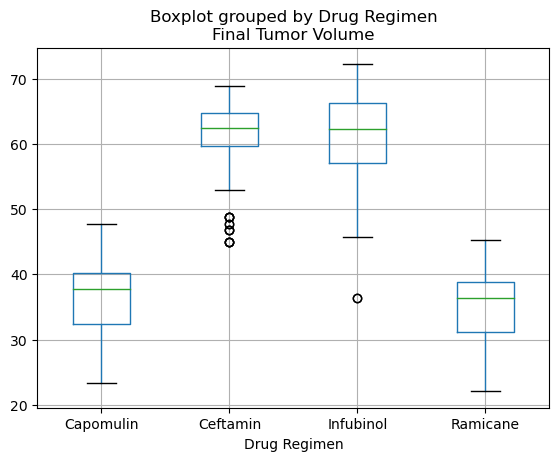

In [59]:
plot = regimens_concat.boxplot(column = 'Final Tumor Volume', by = 'Drug Regimen')


# Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = complete_data_clean.loc[(complete_data_clean['Mouse ID'] == 'l509')]
capo_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


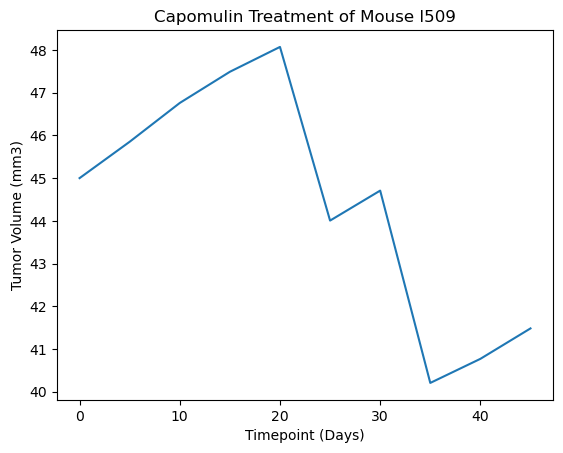

In [30]:
plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

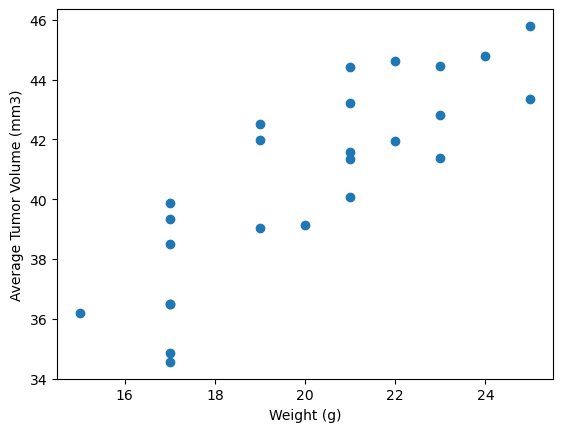

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_scatter1 = capomulin_data['Tumor Volume (mm3)'].groupby(capomulin_data['Mouse ID']).mean()
capo_scatter2 = capomulin_data['Weight (g)'].groupby(capomulin_data['Mouse ID']).mean()
plt.scatter(capo_scatter2, capo_scatter1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_scatter1_df = pd.DataFrame(capo_scatter1)

In [33]:
capo_scatter2_df = pd.DataFrame(capo_scatter2)
capo_scatter3 = capo_scatter2_df.merge(capo_scatter1_df, how = 'left', on = 'Mouse ID')

In [34]:
capo_correlation = capo_scatter3.corr()
print('The correlation between mouse weight and the average tumor volume is ' + str(capo_correlation['Weight (g)']['Tumor Volume (mm3)']))

The correlation between mouse weight and the average tumor volume is 0.8419363424694719


In [35]:
x_values = capo_scatter3['Weight (g)']
y_values = capo_scatter3['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


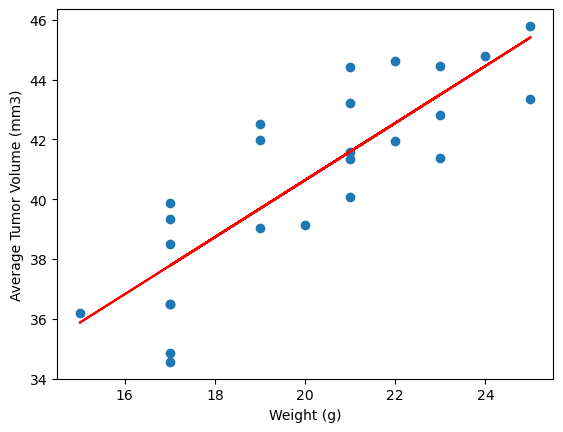

In [36]:
plt.scatter(capo_scatter2, capo_scatter1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
plt.show()